In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline

In [2]:
def normalize(X):
    n = X.shape[0]
    mean = np.mean(X, axis=1).reshape((n, 1))
    std = np.std(X, axis=1).reshape((n, 1))
    X_new = (X - mean) / std**2
    return X_new, mean, std

In [3]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [4]:
def plot_data(X, y):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap=cm_bright)

In [5]:
def fwd_pass(X, params):
    W = params["W"]
    b = params["b"]
    
    Z = np.dot(W, X) + b
    A = sigmoid(Z)
    
    cache = (W, b, Z, A)
    
    return A, cache

In [6]:
def cost(A, Y):
    m = Y.shape[1]
    
    L = - Y * np.log(A) - (1 - Y) * np.log(1 - A)
    J = np.sum(L) / m
    
    return J

In [7]:
def bwd_pass(X, Y, cache):
    n, m = X.shape
    (W, b, Z, A) = cache
    
    dZ = A - Y
    dW = 1. / m * np.dot(X, dZ.T).reshape((1, n))
    db = 1. / m * np.sum(dZ)
    
    grads = {"dW" : dW, "db" : db, "dZ" : dZ}
    return grads

In [8]:
def init_params(n, m):
    W = np.random.randn(1, n) * 0.01
    b = 0
    
    params = {"W" : W, "b" : b}
    return params

In [9]:
def update_params(params, grads, learning_rate):
    W = params["W"]
    b = params["b"]
    
    dW = grads["dW"]
    db = grads["db"]
    
    params["W"] = W - learning_rate * dW
    params["b"] = b - learning_rate * db
    
    return params

In [10]:
def fit(X, Y, learning_rate = 0.01, num_iter = 30000, debug = False):
    n, m = X.shape 
    params = init_params(n, m)
    costs = []
    for i in range(num_iter):
        A, cache = fwd_pass(X, params)
        curr_cost = cost(A, Y)
        grads = bwd_pass(X, Y, cache)
        
        params = update_params(params, grads, learning_rate)
        
        if debug and i % 1000 == 0:
            print("{}-th iteration: {}".format(i, curr_cost))
            costs.append(curr_cost)
    
    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("Iteration, *1000")
    plt.show()
    
    return params    

In [11]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
df = pd.read_csv("sats.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(100, 2), y=(100,)


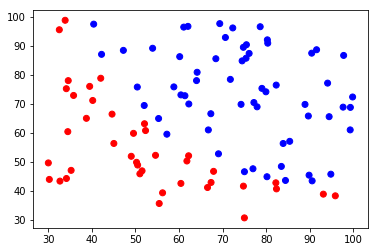

In [12]:
plot_data(X, Y)

In [13]:
Y = Y.values.reshape((df.shape[0], 1))

In [14]:
X, Y = X.T, Y.T

print(X)
print(Y)

print('X: {}'.format(X.shape))
print('y: {}'.format(Y.shape))

[[34.62365962 30.28671077 35.84740877 60.18259939 79.03273605 45.08327748
  61.10666454 75.02474557 76.0987867  84.43281996 95.86155507 75.01365839
  82.30705337 69.36458876 39.53833914 53.97105215 69.07014406 67.94685548
  70.66150955 76.97878373 67.37202755 89.67677575 50.53478829 34.21206098
  77.92409145 62.27101367 80.19018075 93.1143888  61.83020602 38.7858038
  61.37928945 85.40451939 52.10797973 52.04540477 40.23689374 54.63510555
  33.91550011 64.17698887 74.78925296 34.18364003 83.90239366 51.54772027
  94.44336777 82.36875376 51.04775177 62.22267576 77.19303493 97.77159928
  62.0730638  91.5649745  79.94481794 99.27252693 90.54671411 34.52451385
  50.28649612 49.58667722 97.64563396 32.57720017 74.24869137 71.79646206
  75.39561147 35.28611282 56.2538175  30.05882245 44.66826172 66.56089447
  40.45755098 49.07256322 80.27957401 66.74671857 32.72283304 64.03932042
  72.34649423 60.45788574 58.84095622 99.8278578  47.26426911 50.4581598
  60.45555629 82.22666158 88.91389642 94

In [15]:
X, mean, std = normalize(X)

In [16]:
X[:,:5]

array([[-0.08275779, -0.09432804, -0.07949303, -0.01457083,  0.03571817],
       [ 0.03452427, -0.0653091 ,  0.01954037,  0.05875553,  0.02668403]])

In [17]:
Y.shape

(1, 100)

In [18]:
mean

array([[65.64427406],
       [66.22199809]])

In [19]:
std

array([[19.36068671],
       [18.48963567]])

0-th iteration: 0.693155646835711
1000-th iteration: 0.6359627550955512
2000-th iteration: 0.6034214967268932
3000-th iteration: 0.5747943898343506
4000-th iteration: 0.5495408549044091
5000-th iteration: 0.527186488291204
6000-th iteration: 0.5073214805480976
7000-th iteration: 0.4895955448125686
8000-th iteration: 0.47371123712599794
9000-th iteration: 0.4594168854428432
10000-th iteration: 0.44649982742045746
11000-th iteration: 0.43478030360978176
12000-th iteration: 0.42410613303581285
13000-th iteration: 0.4143481735648555
14000-th iteration: 0.40539650632804675
15000-th iteration: 0.39715725726628187
16000-th iteration: 0.3895499633021357
17000-th iteration: 0.3825053956411972
18000-th iteration: 0.37596376235035683
19000-th iteration: 0.36987322338751616
20000-th iteration: 0.36418866198758976
21000-th iteration: 0.35887066597829836
22000-th iteration: 0.3538846809421359
23000-th iteration: 0.3492003041523512
24000-th iteration: 0.3447906940058543
25000-th iteration: 0.34063207

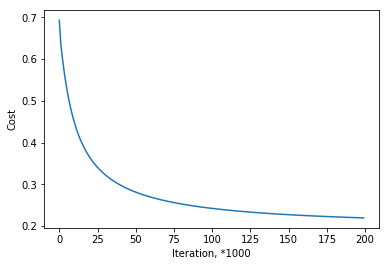

In [20]:
params = fit(X, Y, learning_rate = 0.1, num_iter = 200000, debug = True)

In [21]:
print(params)

{'W': array([[50.95813605, 44.89551154]]), 'b': 1.1463182538519203}
